## 課題5用

In [73]:
import numpy as np
import scipy as sp
import pandas as pd

In [74]:
df_l = pd.read_csv("Dataset/コイル大.csv")
df_s = pd.read_csv("Dataset/コイル小.csv")

In [75]:
df_l.head()

,H,B
0,5.425737,0.004468
1,10.851470,0.008042
2,16.277210,0.020850
3,21.702950,0.041699
4,27.128680,0.062549


In [76]:
df_s.head()

,H,B
0,7.957747,0.00283
1,15.915490,0.01053
2,23.873240,0.53938
3,31.830990,0.77054
4,39.788740,0.84759


In [77]:
def max_mu(df):
    df = df.sort_values("H")
    dx = df["H"].diff()
    dy = df["B"].diff()
    slope = dy/dx
    max_mu = slope.max()
    idx = slope.idxmax()
    print(f"最大傾き: {slope[idx]}")
    print(f"区間: H={df.loc[idx-1, 'H']} to H={df.loc[idx, 'H']}")

In [78]:
max_mu(df_l)

最大傾き: 0.01646890562393331
区間: H=48.83163 to H=54.25737


In [79]:
max_mu(df_s)

最大傾き: 0.06645722723131538
区間: H=15.91549 to H=23.87324


In [81]:
mu_0 = 1.257e-6
max_l = 0.01646890562393331 / mu_0
max_s = 0.06645722723131538 / mu_0
print(f"コイル大: {max_l}")
print(f"コイル小: {max_s}")

コイル大: 13101.754672977971
コイル小: 52869.71140120555


---

## 課題6用

In [89]:
df_20 = pd.read_csv("Dataset/抵抗20.csv")
df_40 = pd.read_csv("Dataset/抵抗40.csv")
df_60 = pd.read_csv("Dataset/抵抗60.csv")
df_80 = pd.read_csv("Dataset/抵抗80.csv")

In [90]:
df_40.head()

,H,B
0,162.772101,0.774514
1,46.118762,-0.011815
2,0.000000,-0.017771
3,-46.118762,-0.893455
4,-162.772101,-0.595603


In [91]:
def b_r(df):
    df_h0 = df[df["H"]==0]
    b_r = df_h0["B"].abs().mean()
    return b_r

In [92]:
print(f"抵抗20のBr: {b_r(df_20):.4f}")
print(f"抵抗40のBr: {b_r(df_40):.4f}")
print(f"抵抗60のBr: {b_r(df_60):.4f}")
print(f"抵抗80のBr: {b_r(df_80):.4f}")

抵抗20のBr: 0.0625
抵抗40のBr: 0.0253
抵抗60のBr: 0.0164
抵抗80のBr: 0.0149


In [93]:
(0.0625+0.0253+0.0164+0.0149)/4

0.029775

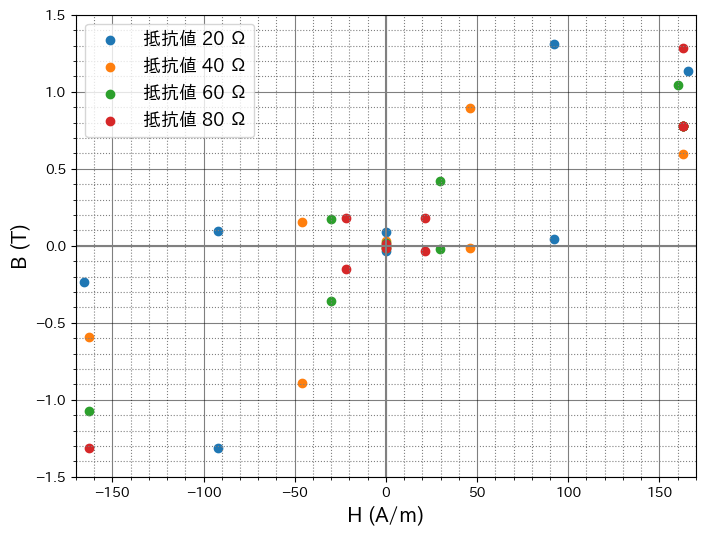

In [111]:
import matplotlib.pyplot as plt
import japanize_matplotlib

df = [df_20, df_40, df_60, df_80]
plt.figure(figsize=(8,6))

r = 20
for df in df:
    df_closed = pd.concat([df, df.iloc[[0]]])
    plt.scatter(df_closed["H"], df_closed["B"], label=f"抵抗値 {r} Ω")
    #area = np.abs(np.trapezoid(df_closed["B"], df_closed["H"]))
    #print(f"{r}Ωのヒステリシス損: {area}")
    r = r + 20

plt.xlim(-170, 170)
plt.ylim(-1.5, 1.5)
plt.xlabel("H (A/m)", fontsize=15)
plt.ylabel("B (T)", fontsize=15)
plt.axvline(x=0, color='gray', linestyle='-')
plt.axhline(y=0, color='gray', linestyle='-')
plt.minorticks_on()
plt.grid(which="major", color="black", alpha=0.5)
plt.grid(which="minor", color="gray", linestyle=":")
plt.legend(fontsize=13)
plt.savefig("Pictures/hysteresis_loop.png")
plt.show()

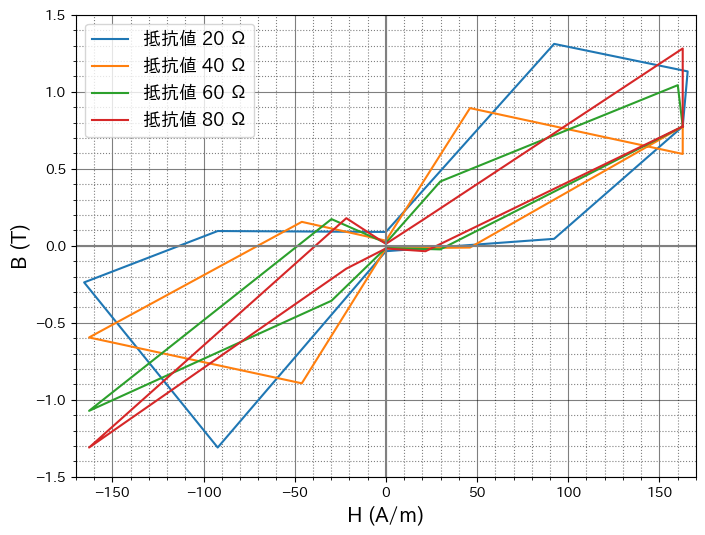

In [114]:
df = [df_20, df_40, df_60, df_80]
plt.figure(figsize=(8,6))

r = 20
for df in df:
    df_closed = pd.concat([df, df.iloc[[0]]])
    plt.plot(df_closed["H"], df_closed["B"], label=f"抵抗値 {r} Ω")
    r = r + 20

plt.xlim(-170, 170)
plt.ylim(-1.5, 1.5)
plt.xlabel("H (A/m)", fontsize=15)
plt.ylabel("B (T)", fontsize=15)
plt.axvline(x=0, color='gray', linestyle='-')
plt.axhline(y=0, color='gray', linestyle='-')
plt.minorticks_on()
plt.grid(which="major", color="black", alpha=0.5)
plt.grid(which="minor", color="gray", linestyle=":")
plt.legend(fontsize=13)
plt.savefig("Pictures/hysteresis_loop.png")
plt.show()

In [116]:
hc = np.array([(115+25)/2, (70+30)/2, (50+33)/2, (40+27)/2])
hc.mean()

np.float64(48.75)

In [117]:
print(hc)

[70.  50.  41.5 33.5]


In [118]:
h_c = 48.75
b_r = 0.029775
b_max = 0.774514

In [119]:
s2 = (2*b_r + 0.5 + b_r) * (h_c/2)
s1 = (0.5 + b_r) * (162 - 48.75) * 0.5
print(s1, s2)

29.998509375 14.364796875


In [124]:
s_all = 2*(30.0 + 14.4)
print(s_all)

88.8
